In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Get csv files

file1 = pd.read_csv('file1.csv')
file2 = pd.read_csv('file2.csv')
file3 = pd.read_csv('file3.csv')


In [3]:
# Show the DataFrames shape

print(file1.shape)
print(file2.shape)
print(file3.shape)


(4008, 11)
(996, 11)
(7070, 11)


In [4]:
# Standardize header names

# File 1
cols_1 = []                    # Create an empty list
for i in range(len(file1.columns)):
    cols_1.append(file1.columns[i].lower().replace(' ', '_'))
file1.columns = cols_1

# File 2
cols_2 = []                    # Create an empty list
for i in range(len(file2.columns)):
    cols_2.append(file2.columns[i].lower().replace(' ', '_'))
file2.columns = cols_2

# File 3
cols_3 = []                    # Create an empty list
for i in range(len(file3.columns)):
    cols_3.append(file3.columns[i].lower().replace(' ', '_'))
file3.columns = cols_3

file1 = file1.rename(columns = {'state': 'st'})
file3 = file3.rename(columns = {'state': 'st'})

In [5]:
file1.columns

Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')

In [6]:
file2.columns

Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'total_claim_amount', 'policy_type', 'vehicle_class'],
      dtype='object')

In [7]:
file3.columns

Index(['customer', 'st', 'customer_lifetime_value', 'education', 'gender',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'total_claim_amount', 'vehicle_class'],
      dtype='object')

In [8]:
# Rearrange the columns in the DataFrame

file2 = file2[file1.columns]       # Let columns in file 2 and 3 mirror the columns in file 1

file3 = file3[file1.columns]


In [9]:
# Concenate the three dataframes

column_names = file1.columns
column_names

data = pd.DataFrame(columns = column_names)                     # Add the column names
data

data = pd.concat([data, file1, file2, file3], axis = 0)         # Concat the three files vertically 
data.shape

(12074, 11)

In [10]:
data.dtypes

customer                      object
st                            object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [11]:
# Numerical columner

data.select_dtypes('float')

,income,monthly_premium_auto,total_claim_amount
0,0.0,1000.0,2.704934
1,0.0,94.0,1131.464935
2,48767.0,108.0,566.472247
3,0.0,106.0,529.881344
4,36357.0,68.0,17.269323
...,...,...,...
7065,71941.0,73.0,198.234764
7066,21604.0,79.0,379.200000
7067,0.0,85.0,790.784983
7068,21941.0,96.0,691.200000


In [12]:
# Categorical columner

data.select_dtypes('object')

,customer,st,gender,education,customer_lifetime_value,number_of_open_complaints,policy_type,vehicle_class
0,RB50392,Washington,NaN,Master,NaN,1/0/00,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,697953.59%,1/0/00,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1288743.17%,1/0/00,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,764586.18%,1/0/00,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,536307.65%,1/0/00,Personal Auto,Four-Door Car
...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23406,0,Personal Auto,Four-Door Car
7066,PK87824,California,F,College,3096.51,0,Corporate Auto,Four-Door Car
7067,TD14365,California,M,Bachelor,8163.89,3,Corporate Auto,Four-Door Car
7068,UP19263,California,M,College,7524.44,0,Personal Auto,Four-Door Car


In [13]:
# Perform data cleaning operations mentioned so far

# Delete 'education' and 'number_of_open_complaints' from the dataframe with drop

data = data.drop(['education', 'number_of_open_complaints'], axis=1)
data

,customer,st,gender,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,697953.59%,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,1288743.17%,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,764586.18%,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,536307.65%,36357.0,68.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,23406,71941.0,73.0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,3096.51,21604.0,79.0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,8163.89,0.0,85.0,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,7524.44,21941.0,96.0,Personal Auto,Four-Door Car,691.200000


In [14]:
# Correct the values in the column `customer_lifetime_value
# Multiply them by 100 and change `dtype` to numerical type

data['customer_lifetime_value'] = data['customer_lifetime_value']*100
data['customer_lifetime_value'] =  pd.to_numeric(data['customer_lifetime_value'], errors='coerce')

In [15]:
# Remove duplicate rows if any

data.shape

(12074, 9)

In [16]:
data = data.drop_duplicates()           # drop_duplicates remove duplicates rows

In [17]:
data.shape

(9135, 9)

In [18]:
# Filter data for customers who have an income of 0 or less

data = data[data['income'] <= 0]
data

,customer,st,gender,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,NaN,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
3,WW63253,California,M,NaN,0.0,106.0,Corporate Auto,SUV,529.881344
7,CF85061,Arizona,M,NaN,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
10,SX51350,California,M,NaN,0.0,67.0,Personal Auto,Four-Door Car,482.400000
...,...,...,...,...,...,...,...,...,...
7059,WZ45103,California,F,5.678050e+05,0.0,76.0,Personal Auto,Four-Door Car,364.800000
7061,RX91025,California,M,1.987226e+06,0.0,185.0,Personal Auto,SUV,1950.725547
7062,AC13887,California,M,4.628995e+05,0.0,67.0,Corporate Auto,Two-Door Car,482.400000
7067,TD14365,California,M,8.163890e+05,0.0,85.0,Corporate Auto,Four-Door Car,790.784983


In [19]:
# Get numeric data

data_num = data._get_numeric_data()
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,NaN,0.0,1000.0,2.704934
1,NaN,0.0,94.0,1131.464935
3,NaN,0.0,106.0,529.881344
7,NaN,0.0,101.0,363.029680
10,NaN,0.0,67.0,482.400000


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,1.821000e+03,2294.0,2294.000000,2294.000000
mean,7.687005e+05,0.0,98.663906,597.165987
std,6.626634e+05,0.0,214.531408,329.287282
min,1.898008e+05,0.0,61.000000,2.455033
25%,3.740404e+05,0.0,69.000000,372.120562
50%,5.619689e+05,0.0,84.000000,521.085476
75%,8.708019e+05,0.0,110.000000,729.547842
max,6.461876e+06,0.0,10202.000000,2759.794354


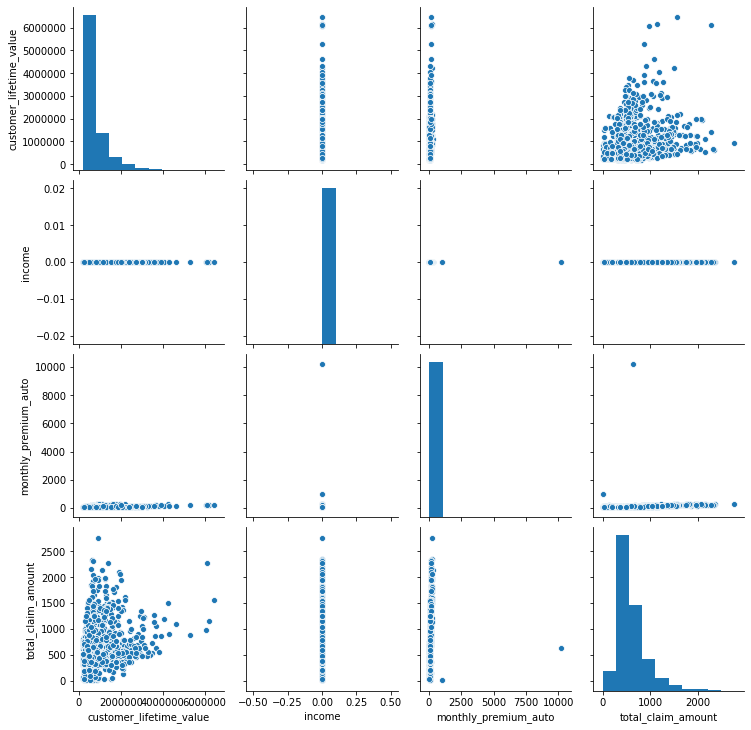

In [20]:
# Check normality 

sns.pairplot(data)
data_num.describe()


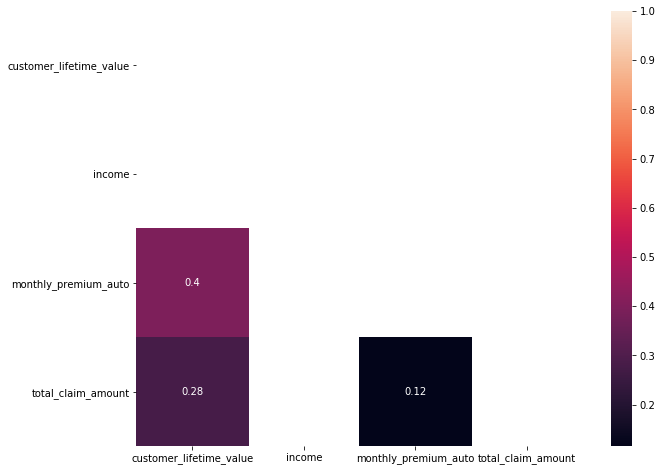

In [22]:
# Check multicollinearity

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [25]:
# Get the data

data1 = pd.read_csv('marketing_customer_analysis.csv')      # import csv file
data1.head() # show first 5 rows

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [26]:
data1.columns = [e.lower().replace(' ', '_') for e in file1.columns]

ValueError: Length mismatch: Expected axis has 24 elements, new values have 11 elements

In [27]:
def clean_data(df):
    df.columns = [e.lower().replace(' ', '_') for e in df.columns]
    df = df.drop(columns = ['unnamed:_0', 'vehicle_type'])
    df = df.dropna()
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors = 'coerce')
    return df

data = clean_data(data)

KeyError: "['unnamed:_0' 'vehicle_type'] not found in axis"